In [1]:
'''
Author: RyanWan
First edition: 2020/1
Last modified: 2020/2/8
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [124]:
def read_file(filename): #Read file and return dataframe
    df = pd.read_csv(filename + '.csv', index_col='Wavelength (nm)')
    return df

In [132]:
def add_statistic_data(df): #Add statistic figure into df
    df['Mean'] = df.mean(axis=1)
    df['Std'] = df.std(axis=1)
    return df

In [112]:
def plot_mean(df, color='r', ls='-', alpha=1 ,label_name='line_plot'): #Plot mean
    plt.style.use('seaborn-darkgrid')
    plt.plot(df['Mean'],c=color, ls=ls, alpha=alpha, label=label_name)

In [121]:
def plot_deviation(df, std=3, alpha=1, facecolor='#FFB880',linewidth=0 ): #Add deviation in plot
    plt.fill_between(x = df.index, 
                 y1 = df['Mean'] - std * df['Std'], y2= df['Mean'] + std * df['Std'],
                 alpha=alpha, facecolor=facecolor ,linewidth=linewidth)

In [384]:
def calculate_Ravg(df,data_count, lower=450, upper=680, USL=1, target_yield=0.95):
    fail_count = 0
    list_of_col = [str(i) for i in range(1, data_count + 1)] #Data start with col=1 not col=0
    for i in list_of_col:
        if df[i].loc['450':'650'].mean() > USL:
            fail_count += 1
        
    predict_yield = round((1 - fail_count / data_count),3)
    
    if predict_yield < target_yield:
        print ('Predict_yield = {}'.format(predict_yield) + '\nDesign out of spec. Please re-design the model.')
    else:
        print ('Predict_yield = {}'.format(predict_yield))

In [388]:
filename1 = 'Original_Design'
filename2 = 'Optimized_Design'
df1 = read_file(filename1)
df2 = read_file(filename2)
df1_data_count = len(df1.columns)
df2_data_count = len(df2.columns)
df1 = add_statistic_data(df1)
df2 = add_statistic_data(df2)

<Figure size 432x288 with 0 Axes>

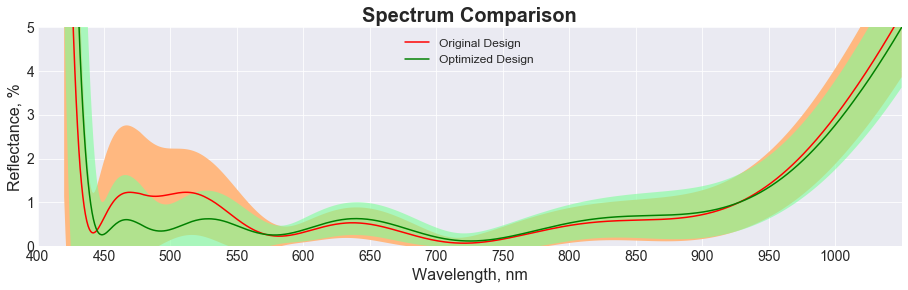

In [389]:
fig = plt.figure()
plt.figure(figsize=(12,4))
plot_mean_with_deviation(df1, label_name='Original Design')
plot_deviation(df1)
plot_mean_with_deviation(df2, color='g',label_name='Optimized Design')
plot_deviation(df2, alpha=0.6, facecolor='#7EFF99')

#Plot style setting
plt.suptitle('Spectrum Comparison', fontsize=20, fontweight='bold')
plt.subplots_adjust(wspace=0.8, top=1)
plt.xlabel('Wavelength, nm',fontsize=16)
plt.ylabel('Reflectance, %',fontsize=16)
plt.legend(loc='upper center',fontsize = 12)
plt.subplots_adjust(left=0,right=1,wspace=0.25,hspace=0.25,bottom=0.15,top=0.91)
plt.ylim((0., 5.)), plt.xlim((400, 1050))
plt.xticks(np.arange(400, 1050, 50))
plt.tick_params(axis="x", labelsize=14), plt.tick_params(axis="y", labelsize=14)

plt.savefig('R%.png')
plt.show()


In [390]:
df1_yield = calculate_Ravg(df1,data_count=df1_data_count,USL=1)
df2_yield = calculate_Ravg(df2,data_count=df2_data_count,USL=1)

Predict_yield = 0.926
Design out of spec. Please re-design the model.
Predict_yield = 1.0
